<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Metropolis_Hastings_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M É T O D O - M E T R O P O L I S

El Método Metropolis-Hastings es una técnica que se usa para obtener muestras de datos cuando es difícil hacerlo de manera directa. Funciona como un proceso de ensayo y error: primero, propone posibles valores (muestras) y luego decide si los acepta o no, dependiendo de qué tan bien se ajusten a la distribución de probabilidad que se está buscando.

Es muy útil cuando la distribución es complicada y no se puede obtener directamente o cuando hacer los cálculos sería muy costoso o difícil. Así, a través de varias repeticiones, va generando una secuencia de muestras que, con el tiempo, se parecen mucho a los datos que estaríamos buscando si pudiéramos obtenerlos de manera directa.



# EJEMPLO 1: Distribución Normal

Aproximaremos la distribución normal con el método de metropolis, la cual tiene la siguiente función de densidad:
$$ f(x,\mu,\sigma)= \frac{1}{\sigma \sqrt{2\pi}} e ^-\frac{(x-\mu) ^2}{2\sigma ^2}$$

In [28]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# Definimos nuestra función de densidad de la distribucion normal
def f(x,mu,std):
  return(1/np.sqrt(2*np.pi*std**2))*np.exp(-(x-mu)**2/(2*std**2))

In [30]:
# Definimos nuestras variables
mu=0.4
sigma=0.1

In [31]:
delta=0.1  # Entre mas grande sea delta la aceptación es menor

In [35]:
n=50000               # Número de iteraciones (funciona solo cuando "n" es muy grande)
x= np.zeros(n)        # Generamos un vector con puros ceros, aqui se guardaran los valores de las probabilidades
x[0]=0                # Valor inicial de la cadena
acept=0

for i in range(0,n-1):
  y=x[i]+np.random.uniform(-delta,delta)  # Sumaremos el valor inicial mas un numero aleatorio que sigue la distribucion dicha
  if np.random.rand() < min(1,f(y,mu,sigma)/f(x[i],mu,sigma)): # Condicion de metropolis hastings
    x[i+1]=y       #  Si cumple la condición se genera otro número y se almacena el obtenido anteriormente
    acept=acept+1
  else:
    x[i+1]=x[i]  # Si no cumple la condicion, se queda el mismo numero generado anteriormente

# Los números que se van generando con llevan a un movimiento browniano



La aceptación fue del 80.50%


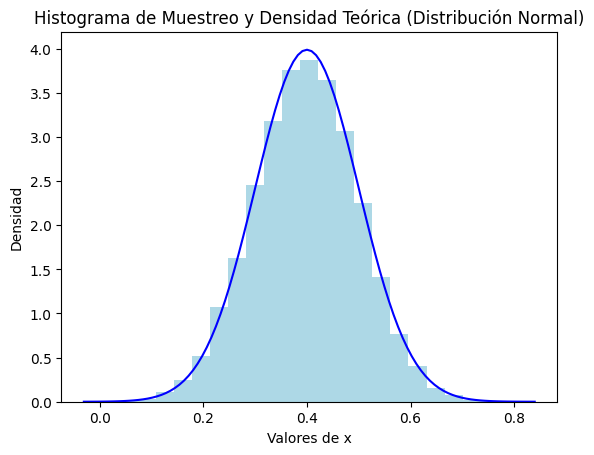

In [36]:
# Graficamos nuestra distribución analítica junto con el histograma de la muestra generada

print(f"La aceptación fue del {((acept / n) * 100):.2f}%")
plt.hist(x,density=True,color='#ADD8E6',bins=25)
xs=np.linspace(min(x), max(x),100)   # Defiminos los límites de nuestra gráfica
plt.plot(xs,f(xs,mu,sigma),color='#0000FF')
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Normal)')
plt.show()

#M-E-D-I-A    Y  V-A-R-I-A-N-Z-A

Ahora calcularemos la media y varianza de forma analítica y la programaremos para corraborar el resultado, para ello recordemos que estan definidas como:

* **MEDIA:** Para una distribución normal $X \sim N(\mu, \sigma^2)$, esto se convierte en:

  $$E[X]=  \int_{-\infty} ^{ ∞} x \frac{1}{\sigma \sqrt{2\pi}} e ^ -\frac{(x-\mu) ^2}{2\sigma ^2} dx$$

  y la integral da como resultado directamente:

  $$ E[X] = \mu$$
  por lo que la media sera igual a:
   $$ E[X]=0.4$$

* **VARIANZA:** La varianza de una variable se define como:

  $$ Var(X)= \int_{-\infty} ^{ ∞} (x-\mu)^2 \frac{1}{\sigma \sqrt{2\pi}} e ^ -\frac{(x-\mu) ^2}{2\sigma ^2} dx$$

 y da como resultado:

 $$Var(X)=\sigma^2$$

 por lo que la varianza sera igual a:

 $$Var(X)=(0.1)^2 = 0.01$$

 y desviación estándar:
  $$ \sigma = \sqrt{Var(X)} = \sqrt{0.01} = 0.1$$

 Finalmente comprobamos los resultados


Media muestral: 0.40
Varianza muestral: 0.01
Desviación estándar: 0.1


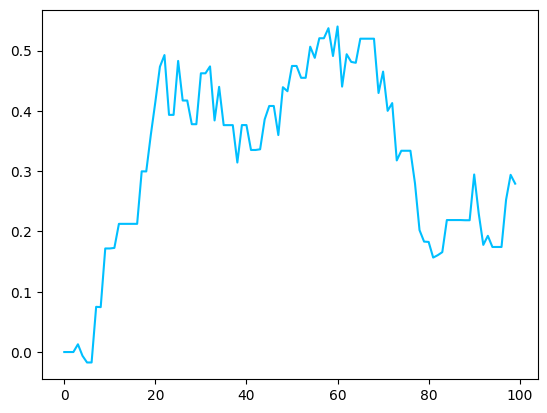

In [37]:
# Media y varianza muestrales
media = np.mean(x)
varianza = np.var(x)
desv_est = np.std(x)
print(f"Media muestral: {media:.2f}")
print(f"Varianza muestral: {varianza:.2}")
print(f"Desviación estándar: {desv_est:.2}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x[0:100],color="#00BFFF") # Primeros 100 datos

# EJEMPLO 2: Distribución de Cauchy
Ahora aproximaremos la distribución de Cauchy con el método de metropolis, la cual tiene la siguiente función de densidad:
$$ f(x,x_0,\gamma)= \frac{1}{\pi \gamma [\ 1+(\frac{x-x_0}{\gamma})^2]\ }$$


In [38]:
# Definimos nuestra función de densidad de la distribución de Cauchy

def Cauchy(x2, x02, gamma):
    return 1 / (np.pi * gamma * (1 + ((x2 - x02) / gamma)**2))

In [39]:
# Parámetros de la distribución Cauchy
x02 = 0   # Localización
gamma = 1  # Escala
delta2 = 1

In [40]:
n2 = 5000  # Número de iteraciones (funciona solo cuando "n" es muy grande)
x2 = np.zeros(n2)  # Vector para los valores generados
x2[0] = 0  # Valor inicial
acept2 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n2-1):
    y2 = x2[i] + np.random.uniform(-delta2, delta2)  # Sumaremos el valor inicial mas un numero aleatorio que sigue la distribucion dicha
    if np.random.rand() < min(1, Cauchy(y2, x02, gamma) / Cauchy(x2[i], x02, gamma)):  # Condicion de metropolis hastings
        x2[i+1] = y2
        acept2 += 1
    else:
        x2[i+1] = x2[i]


La aceptación fue del 84.12%


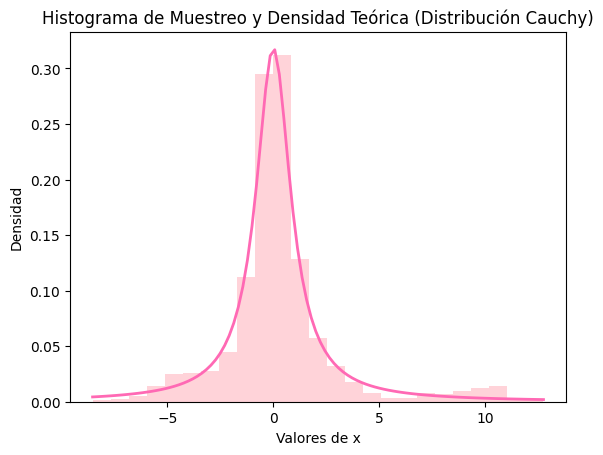

In [41]:
# Imprimimos la tasa de aceptación
print(f"La aceptación fue del {((acept2 / n2) * 100):.2f}%")

# Graficamos el histograma y función de densidad
plt.hist(x2, density=True, alpha=0.6,bins=25, color='#FFB6C1')  # Histograma de los valores generados
xs2 = np.linspace(min(x2), max(x2), 100)  # Rango para graficar la densidad teórica
plt.plot(xs2, Cauchy(xs2, x02, gamma), color="#FF69B4", linewidth=2)  # Gráfico de la función de densidad
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Cauchy)')
plt.show()

#M-E-D-I-A    Y  V-A-R-I-A-N-Z-A

A diferencia de la distribución normal, en la distribución de Cauchy tendremos que:

* **MEDIA:** Para calcular la media, se utilizaría la definición del valor esperado:

 $$E[X]=\int_{-\infty}^{\infty} xf(x)dx$$

 Sin embargo, vemos que al intentar calcular esta integral para la distribución de Cauchy, nos, dado que la integral diverge debido a las colas pesadas de la función de densidad, por lo que **la media no esta definida**.

* **VARIANZA:** Dado que la media no está definida, la varianza tampoco se puede calcular de manera convencional, por lo que **la varianza y desviación estándar no está definida** para la distribución de Cauchy.

Aunque no podemos calcular la media o la varianza de la distribución de Cauchy de forma analítica, puedemos observar su comportamiento con el conjunto de datos muestreados anteriormente de esta distribución, sin olvidar que los resultados de la media y la varianza no son representativos al 100% debido a la naturaleza de la distribución.

Media muestral: 0.33
Varianza muestral: 7.8
Desviación estándar: 2.8


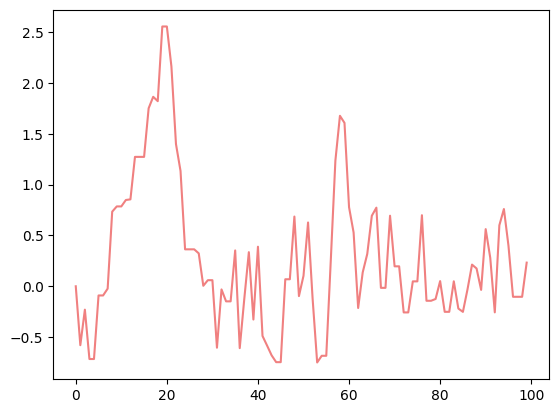

In [42]:
# Media y varianza muestrales
media2 = np.mean(x2)
varianza2 = np.var(x2)
desv_est2 = np.std(x2)
print(f"Media muestral: {media2:.2f}")
print(f"Varianza muestral: {varianza2:.2}")
print(f"Desviación estándar: {desv_est2:.2}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x2[0:100],color="#F08080") # Primeros 100 datos

# EJEMPLO 3: Distribución Chi-Cuadrada
La función de densidad de la distribución chi-cuadrada con $k$ grados de libertad se define como:


$$ f(x) = \frac{1}{2^{\frac{k}{2}} Γ(\frac{k}{2})}x^{(\frac{k}{2})-1} e ^\frac{-x}{2} \ \text{ para } x>0 $$

donde $\Gamma$ es la función gamma.

In [55]:
# Importamos la siguioente libreria que nos ayudara a inportar la función gamma
from scipy.special import gamma

In [56]:
# Función de densidad de la distribución chi-cuadrada
def Chi_cuadrada(x3, k):
    return (1 / (2**(k / 2) * gamma(k / 2))) * (x3**((k / 2) - 1)) * np.exp(-x3 / 2)

In [57]:
# Parámetros de la distribución chi-cuadrada
k = 4  # Grados de libertad
delta3 = 1

In [58]:
n3 = 5000  # Número de iteraciones (funciona solo cuando "n" es muy grande)
x3 = np.zeros(n3)  # Vector para los valores generados
x3[0] = 0.1  # Valor inicial (debe ser positivo)
acept3 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n3-1):
    y3 = x3[i] + np.random.uniform(-delta3, delta3)  # Sumaremos el valor inicial mas un numero aleatorio que sigue la distribucion dicha
    if np.random.rand() < min(1, Chi_cuadrada(y3, k) / Chi_cuadrada(x3[i],k)):  # Condicion de metropolis hastings
        x3[i+1] = y3
        acept3 += 1
    else:
        x3[i+1] = x3[i]

La aceptación fue del 90.24%


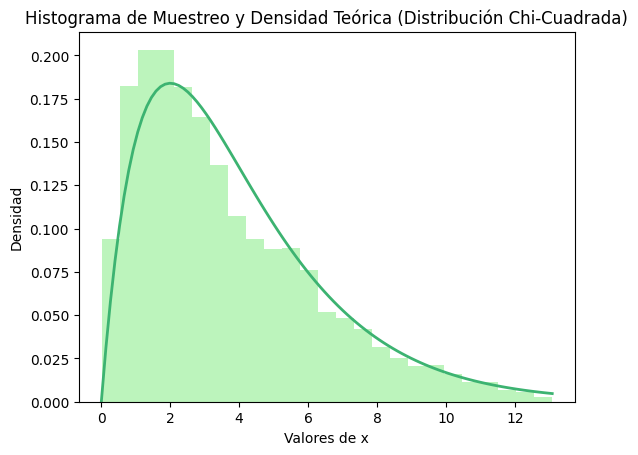

In [59]:
# Imprimimos la tasa de aceptación
print(f"La aceptación fue del {((acept3 / n3) * 100):.2f}%")

# Graficamos el histograma y función de densidad
plt.hist(x3, density=True, alpha=0.6,bins=25, color='#90EE90')  # Histograma de los valores generados
xs3 = np.linspace(0, max(x3), 100)  # Rango para graficar la densidad teórica
plt.plot(xs3, Chi_cuadrada(xs3,k), color="#3CB371", linewidth=2)  # Gráfico de la función de densidad
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Chi-Cuadrada)')
plt.show()

#M-E-D-I-A    Y  V-A-R-I-A-N-Z-A

* **MEDIA:** La media de la distribución chi-cuadrada se calcula con la siguiente fórmula

  $$ \mu = k$$

 donde $k$ son los grados de libertad, por lo tanto

 $$ \mu = 4$$

* **VARIANZA:** La varianza se calcula de la siguiente manera

 $$ \sigma^2=2k$$
 asi
 $$ \sigma^2=2(4)=8$$

 por lo que la desviación estándar sera igual a:

 $$\sigma=\sqrt{\sigma^2}=\sqrt{8}=2\sqrt{2}\approx 2.82$$

 Finalmente comprobamos lo anterior programando lo siguiente

Media muestral: 3.61
Varianza muestral: 6.7
Desviación estándar: 2.6


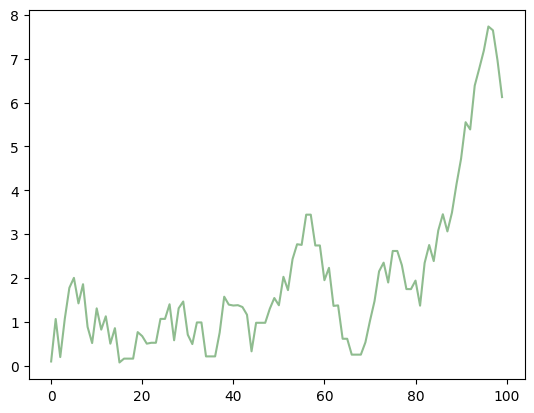

In [60]:
# Media y varianza muestrales
media3 = np.mean(x3)
varianza3 = np.var(x3)
desv_est3 = np.std(x3)
print(f"Media muestral: {media3:.2f}")
print(f"Varianza muestral: {varianza3:.2}")
print(f"Desviación estándar: {desv_est3:.2}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x3[0:100],color="#8FBC8F") # Primeros 100 datos

#EJEMPLO 4: Distribución Uniforme

La distribución uniforme es una de las distribuciones más simples y se define por un intervalo $[a,b]$ donde todos los valores tienen la misma probabilidad de ocurrir.

$$f(x)=\left\{ \begin{array}{lcc} \frac{1}{b-a} & si & a \leq x \leq b \\ \\ 0 & \text{en otro caso}  \end{array} \right.$$

In [61]:
# Función de densidad de la distribución uniforme
def Uniform(x4, a, b):
    return np.where((x4 >= a) & (x4 <= b), 1/(b-a), 0)

In [62]:
# Parámetros de la distribución uniforme
a = 3  # Límite inferior
b = 5  # Límite superior
delta4 = 1

In [66]:
n4 = 5000  # Número de iteraciones (funciona solo cuando "n" es muy grande)
x4 = np.zeros(n4)  # Vector para los valores generados
x4[0] = np.random.uniform(a, b)  # Valor inicial aleatorio dentro del intervalo
acept4 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n4-1):
    y4 = x4[i] + np.random.uniform(-delta4, delta4)  # Sumaremos el valor inicial mas un numero aleatorio que sigue la distribucion dicha
    if np.random.rand() < min(1, Uniform(y4,a,b) / Uniform(x4[i],a,b)):  # Condicion de metropolis hastings
        x4[i+1] = y4
        acept4 += 1
    else:
        x4[i+1] = x4[i]

La aceptación fue del 75.98%


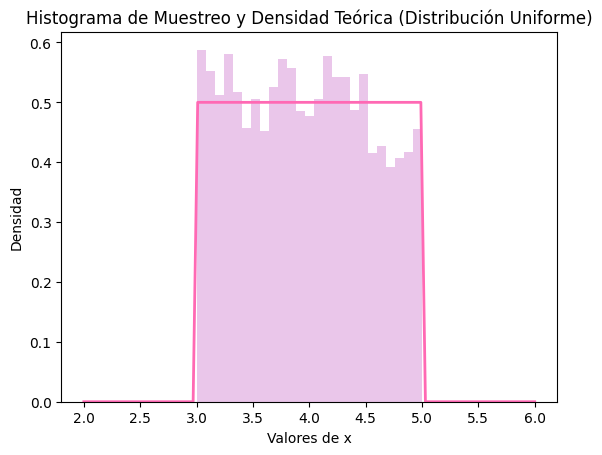

In [67]:
# Imprimimos la tasa de aceptación
print(f"La aceptación fue del {((acept4 / n4) * 100):.2f}%")

# Graficamos el histograma y función de densidad
plt.hist(x4, density=True, alpha=0.6,bins=25, color='#DDA0DD')  # Histograma de los valores generados
xs4 = np.linspace(a - 1, b + 1, 100)  # Rango para graficar la densidad teórica
plt.plot(xs4, Uniform(xs4,a,b), color="#FF69B4", linewidth=2)  # Gráfico de la función de densidad
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Uniforme)')
plt.show()

#M-E-D-I-A    Y  V-A-R-I-A-N-Z-A

* **MEDIA:** La media $\mu$ de una distribución uniforme $U(a,b)$ se calcula como:

$$ \mu=\frac{a+b}{2}$$
por lo que tendriamos que
$$\mu=\frac{3+5}{2}=4$$

* **VARIANZA:** Por lo que la varianza se calcula como

$$\sigma^2 = \frac{(b-a)^2}{12}$$

por lo que

$$\sigma^2=\frac{5-3}{12}\approx 1.66$$

por lo que la desviación estándar es igual a

$$ \sigma = \sqrt{\frac{1}{6}}\approx0.40 $$

Comprobamos estos resultados con la muestra generada anteriormente, por lo que se programa lo siguiente

Media muestral: 3.96
Varianza muestral: 0.32
Desviación estándar: 0.57


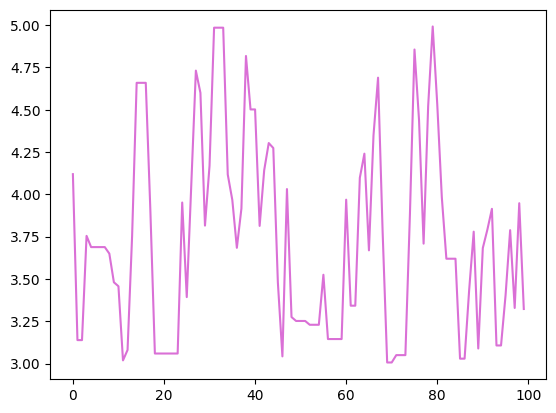

In [68]:
# Media y varianza muestrales
media4 = np.mean(x4)
varianza4 = np.var(x4)
desv_est4 = np.std(x4)
print(f"Media muestral: {media4:.2f}")
print(f"Varianza muestral: {varianza4:.2}")
print(f"Desviación estándar: {desv_est4:.2}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x4[0:100],color="#DA70D6") # Primeros 100 datos